In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#  [Indian Liver Patient Dataset](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset))

In [20]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [10]:
liver = pd.read_csv('./liver.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
np.sum(liver.isna()) / len(liver)
# <5% ok to drop

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.006861
Dataset                       0.000000
dtype: float64

In [13]:
liver.dropna(inplace=True)
liver.reset_index(drop=True, inplace=True)

In [14]:
liver_ = liver.copy()
liver_.columns.values

array(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'], dtype=object)

In [15]:
gender = liver_['Gender'].map({'Female': 0, 'Male': 1})
liver_.drop(columns=['Gender', 'Dataset'], inplace=True)
liver_ = scale(liver_)

In [16]:
cols = ['Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
        'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
        'Aspartate_Aminotransferase_std', 'Total_Proteins_std', 'Albumin_std',
        'Albumin_and_Globulin_Ratio_std']
liver_prepped = pd.DataFrame(liver_, columns=cols)
liver_prepped['is_male'] = gender.astype('int')
liver_prepped.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Proteins_std,Albumin_std,Albumin_and_Globulin_Ratio_std,is_male
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1


In [17]:
X = liver_prepped.copy()
y = liver['Dataset'] #this col corresponds to whether a patient as liver disease or not

In [18]:
X.shape

(579, 10)

In [19]:
y.shape

(579,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=1)

In [29]:
X_train.shape

(463, 10)

In [30]:
X_test.shape

(116, 10)

## Bagging (Bootstrap Aggregation) Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [26]:
# initiate tree
dt = DecisionTreeClassifier(random_state=1)

In [27]:
# initiate bagging
bc = BaggingClassifier(base_estimator=dt,
                       n_estimators=50,
                       random_state=1)

In [32]:
# fit and predict
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

# eval
acc = accuracy_score(y_test, y_pred)
print(f'Test Acc: {acc: .2f}')

Test Acc:  0.71


## Out-of-Bag (OOB) Evaluation

In [33]:
dt = DecisionTreeClassifier(min_samples_leaf=8,
                            random_state=1)

In [34]:
bc = BaggingClassifier(base_estimator=dt,
                       n_estimators=50, 
                       oob_score=True,
                       random_state=1)

In [37]:
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

acc = accuracy_score(y_test, y_pred)

# get oob accuracy
acc_oob = bc.oob_score_

print(f'Test acc: {acc: .3f},\n OOB acc: {acc_oob: .3f}')

Test acc:  0.707,
 OOB acc:  0.676


# [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) Dataset

In [38]:
bikes = pd.read_csv('./bikes.csv')
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [39]:
bikes.shape

(1488, 13)

In [40]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [47]:
X = bikes.drop('cnt', axis=1)
y = bikes['cnt']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [49]:
X_train.shape

(1190, 12)

In [50]:
X_test.shape

(298, 12)

# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor

In [52]:
# initiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

In [53]:
# fit
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

In [55]:
# eval
y_pred = rf.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print(f'Test Acc: {rmse: 0.2f}')

Test Acc:  51.84


In [57]:
# let's compare with a single tree regressor
dt = DecisionTreeRegressor(random_state=2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

rmse = np.sqrt(MSE(y_test, y_pred))
print(f'Test Acc (Single): {rmse: 0.2f}')

Test Acc (Single):  68.81


Now, we determine which features were most predictive by visualization

In [58]:
# create a series of feature importances
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

In [59]:
# sort importances
imp_sorted = importances.sort_values()

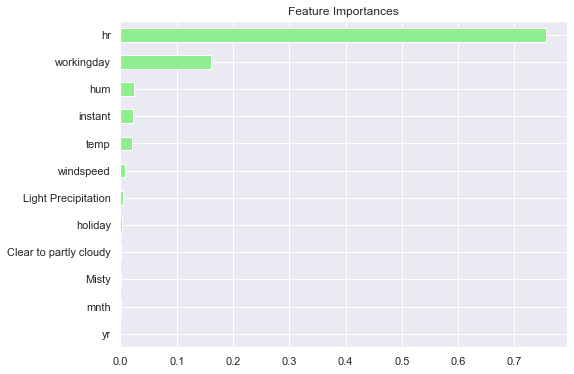

In [60]:
# horizontal barplot
imp_sorted.plot(kind='barh',
                color='lightgreen',
                figsize=(8, 6))
plt.title('Feature Importances')
plt.show()